In [9]:
import julia
from julia import Main

julia.install()



#Julia Implementation of RBF Kernel


In [10]:
Main.eval("""
using KernelFunctions
function rbf_julia(X, Y, length_scale)
    kernel = ScaledKernel(SqExponentialKernel(), 1.0 / length_scale)
    return kernelmatrix(kernel, X', Y')
end
""")


<PyCall.jlwrap rbf_julia>

The RBFKernel() function from the KernelFunctions.jl package in Julia computes the RBF kernel between all pairs of columns in X and Y using the formula:
$$
k(x, y) = \exp\left(-\frac{||x - y||^2}{2}\right)
$$

The RBF class from sklearn.gaussian_process.kernels computes the RBF kernel between all pairs of rows in X and Y using the formula:
$$
k(x, y) = \exp\left(-\frac{||x - y||^2}{2l^2}\right)
$$

The rbf_kernel function from sklearn.metrics.pairwise computes the RBF kernel between two sets of samples X and Y using the formula:
$$
k(x, y) = \exp\left(-\gamma ||x - y||^2\right)
$$



In [11]:
from sklearn.gaussian_process.kernels import RBF as RBF_GP
from sklearn.metrics.pairwise import rbf_kernel as RBF_PW

# Instantiate the RBF kernel from sklearn.gaussian_process.kernels
rbf_gp = RBF_GP(length_scale=1.0)

# Use the rbf_kernel function from sklearn.metrics.pairwise
def rbf_pw(X, Y=None, length_scale=1.0):
    gamma = 1.0 / (2 * length_scale ** 2)
    return RBF_PW(X, Y, gamma=gamma)

In [12]:
# Generate some sample data
import numpy as np
X = np.random.rand(10, 2)
Y = np.random.rand(10, 2)

# Compute the RBF kernel using the three functions
K_gp = rbf_gp(X, Y)
K_pw = rbf_pw(X, Y)
K_julia = Main.rbf_julia(X, Y, 1.0)

# Compare the results
print("RBF_GP:", K_gp)
print("RBF_PW:", K_pw)
print("RBF_Julia:", K_julia)


RBF_GP: [[0.76914273 0.74640493 0.95258167 0.80193676 0.68863021 0.73950097
  0.97545651 0.6624344  0.79277346 0.81259653]
 [0.91878344 0.77413377 0.83516896 0.97792038 0.71446859 0.95809088
  0.74801535 0.84217044 0.99826194 0.80757761]
 [0.92140299 0.78643083 0.86122442 0.97853545 0.72584178 0.95373532
  0.78071543 0.8399198  0.99615214 0.82352616]
 [0.99144753 0.9181519  0.83213016 0.81663422 0.88863069 0.99115733
  0.71795282 0.98593265 0.93499804 0.9139452 ]
 [0.95590299 0.91058625 0.97519321 0.87778389 0.86187969 0.93495762
  0.91678864 0.88655383 0.93727045 0.94682338]
 [0.89618327 0.74341159 0.81801978 0.98751882 0.68177802 0.94140789
  0.7342542  0.81362587 0.9933946  0.77970114]
 [0.88728816 0.7343972  0.81909606 0.99150118 0.67170354 0.93261877
  0.73894157 0.80076162 0.99027011 0.77300957]
 [0.86059354 0.73100879 0.86949661 0.98559712 0.66483737 0.88992411
  0.81594608 0.75686916 0.96313483 0.78235937]
 [0.84254089 0.75752004 0.93100816 0.92914924 0.69286057 0.8445097
  0.9

In [13]:
# Compute the mean absolute difference between the kernel matrices
mad_gp_pw = np.mean(np.abs(K_gp - K_pw))
mad_gp_julia = np.mean(np.abs(K_gp - K_julia))
mad_pw_julia = np.mean(np.abs(K_pw - K_julia))

print("Mean Absolute Difference between RBF_GP and RBF_PW:", mad_gp_pw)
print("Mean Absolute Difference between RBF_GP and RBF_Julia:", mad_gp_julia)
print("Mean Absolute Difference between RBF_PW and RBF_Julia:", mad_pw_julia)

# Compute the mean squared difference between the kernel matrices
msd_gp_pw = np.mean((K_gp - K_pw) ** 2)
msd_gp_julia = np.mean((K_gp - K_julia) ** 2)
msd_pw_julia = np.mean((K_pw - K_julia) ** 2)

print("Mean Squared Difference between RBF_GP and RBF_PW:", msd_gp_pw)
print("Mean Squared Difference between RBF_GP and RBF_Julia:", msd_gp_julia)
print("Mean Squared Difference between RBF_PW and RBF_Julia:", msd_pw_julia)


Mean Absolute Difference between RBF_GP and RBF_PW: 3.1086244689504386e-17
Mean Absolute Difference between RBF_GP and RBF_Julia: 3.552713678800501e-17
Mean Absolute Difference between RBF_PW and RBF_Julia: 1.7763568394002505e-17
Mean Squared Difference between RBF_GP and RBF_PW: 3.697785493223493e-33
Mean Squared Difference between RBF_GP and RBF_Julia: 4.437342591868191e-33
Mean Squared Difference between RBF_PW and RBF_Julia: 1.9721522630525296e-33


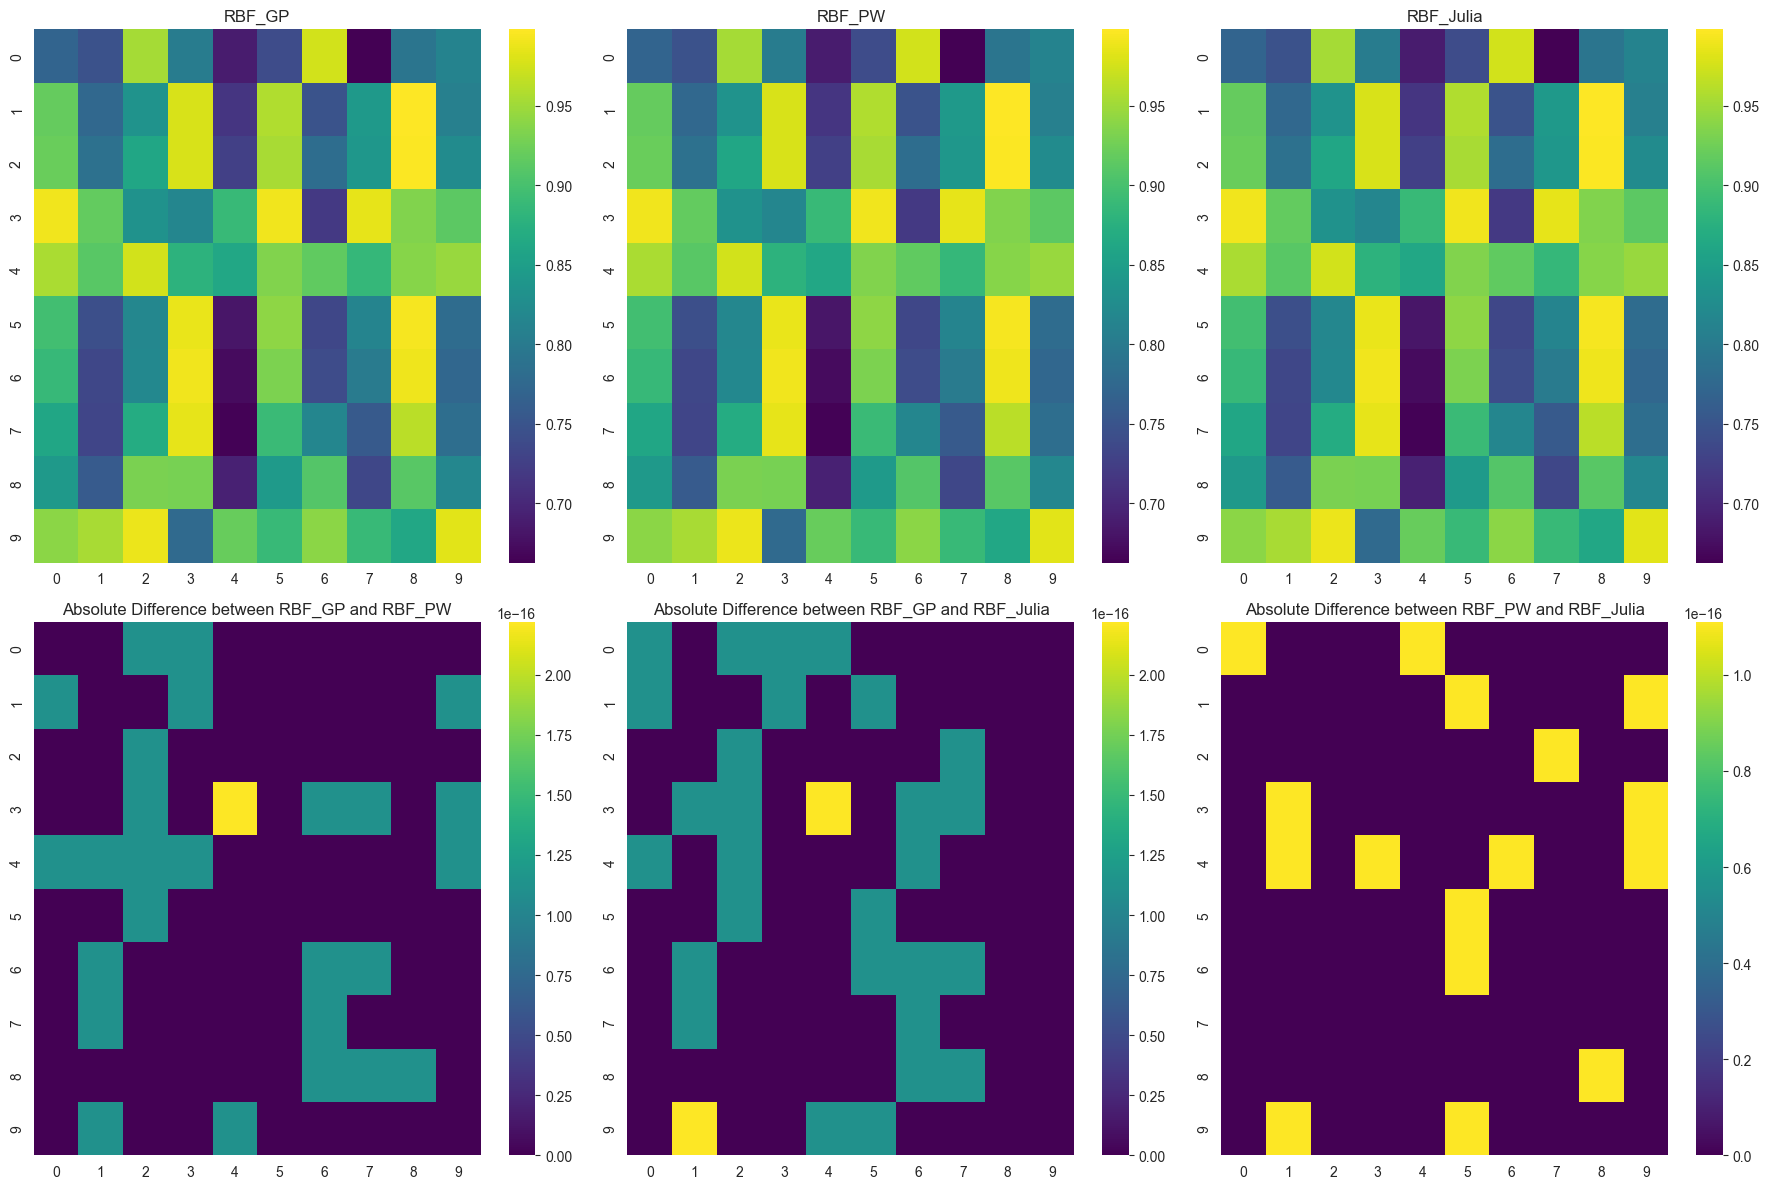

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Plot heatmaps of the kernel matrices
sns.heatmap(K_gp, ax=axs[0, 0], cmap='viridis')
axs[0, 0].set_title('RBF_GP')

sns.heatmap(K_pw, ax=axs[0, 1], cmap='viridis')
axs[0, 1].set_title('RBF_PW')

sns.heatmap(K_julia, ax=axs[0, 2], cmap='viridis')
axs[0, 2].set_title('RBF_Julia')

# Plot heatmaps of the differences between the kernel matrices
sns.heatmap(np.abs(K_gp - K_pw), ax=axs[1, 0], cmap='viridis')
axs[1, 0].set_title('Absolute Difference between RBF_GP and RBF_PW')

sns.heatmap(np.abs(K_gp - K_julia), ax=axs[1, 1], cmap='viridis')
axs[1, 1].set_title('Absolute Difference between RBF_GP and RBF_Julia')

sns.heatmap(np.abs(K_pw - K_julia), ax=axs[1, 2], cmap='viridis')
axs[1, 2].set_title('Absolute Difference between RBF_PW and RBF_Julia')

# Show the figure
plt.tight_layout()
plt.show()


#Compare Linear Kernels in Julia vs. Python

In [21]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.gaussian_process.kernels import DotProduct

# sklearn.metrics.pairwise
linear_pw = linear_kernel

# sklearn.gaussian_process.kernels
linear_gp = DotProduct()

K_julia = Main.linear_julia(X, Y)


In [27]:
Main.eval("""
using KernelFunctions
linear_julia = LinearKernel()

function apply_linear_kernel(X, Y)
    return kernelmatrix(linear_julia, X', Y')
end
""")


<PyCall.jlwrap apply_linear_kernel>

The LinearKernel() function from the KernelFunctions.jl package in Julia computes the Linear kernel between all pairs of columns in X and Y using the formula:

$$
k(x, y; c) = x^T y + c
$$



The DotProduct class from sklearn.gaussian_process.kernels computes the Linear kernel between all pairs of rows in X and Y using the formula:

$$
k(x, y) = (x \cdot y + c)^d
$$



The linear_kernel function from sklearn.metrics.pairwise computes the Linear kernel between two sets of samples X and Y using the formula:

$$
k(x, y) = x^T y
$$


In these formulas, x and y are the input vectors.

In [29]:
from pycalibration import ca

# Compute the kernel matrices
K_pw = linear_pw(X, Y)
K_gp = linear_gp(X, Y)
K_julia = Main.apply_linear_kernel(X, Y)


# Compute the mean absolute difference and mean squared difference
mad_pw_gp = np.mean(np.abs(K_pw - K_gp))
msd_pw_gp = np.mean((K_pw - K_gp) ** 2)
mad_pw_julia = np.mean(np.abs(K_pw - K_julia))
msd_pw_julia = np.mean((K_pw - K_julia) ** 2)

print(f"Mean absolute difference between sklearn.metrics.pairwise and sklearn.gaussian_process.kernels: {mad_pw_gp}")
print(f"Mean squared difference between sklearn.metrics.pairwise and sklearn.gaussian_process.kernels: {msd_pw_gp}")
print(f"Mean absolute difference between sklearn.metrics.pairwise and Julia: {mad_pw_julia}")
print(f"Mean squared difference between sklearn.metrics.pairwise and Julia: {msd_pw_julia}")


Mean absolute difference between sklearn.metrics.pairwise and sklearn.gaussian_process.kernels: 1.0
Mean squared difference between sklearn.metrics.pairwise and sklearn.gaussian_process.kernels: 1.0
Mean absolute difference between sklearn.metrics.pairwise and Julia: 1.582067810090848e-17
Mean squared difference between sklearn.metrics.pairwise and Julia: 1.918226224609687e-33


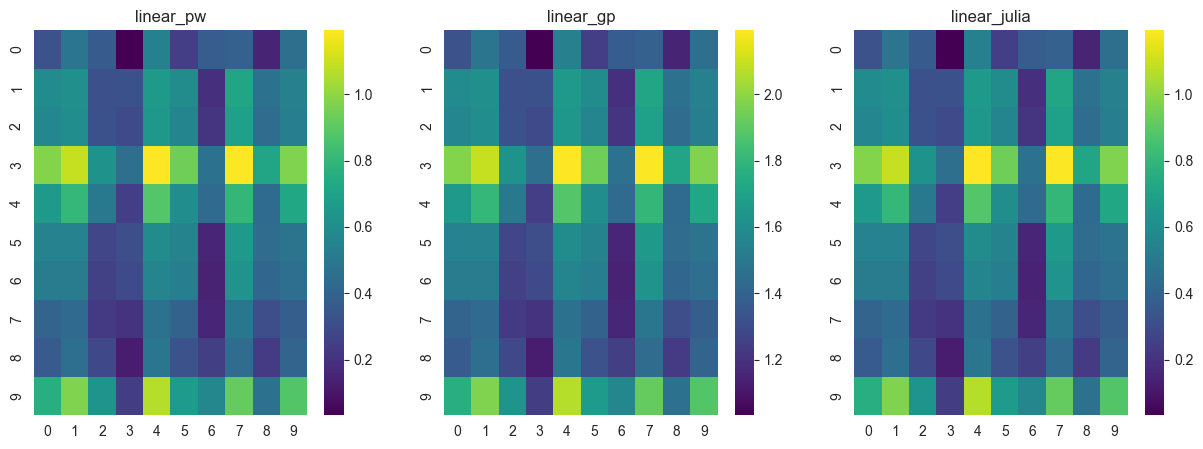

In [30]:
# Compute the kernel matrices
K_pw = linear_pw(X, Y)
K_gp = linear_gp(X, Y)
K_julia = Main.apply_linear_kernel(X, Y)

# Create a figure with 3 subplots
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Create a heatmap for the kernel matrix computed by linear_pw
sns.heatmap(K_pw, ax=axs[0], cmap='viridis')
axs[0].set_title('linear_pw')

# Create a heatmap for the kernel matrix computed by linear_gp
sns.heatmap(K_gp, ax=axs[1], cmap='viridis')
axs[1].set_title('linear_gp')

# Create a heatmap for the kernel matrix computed by linear_julia
sns.heatmap(K_julia, ax=axs[2], cmap='viridis')
axs[2].set_title('linear_julia')

# Display the figure
plt.show()